In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 656 kB/s 
     |████████████████████████████████| 453 kB 62.6 MB/s 


In [ ]:
from konlpy.tag import Okt
okt = Okt()

from collections import Counter
import os

import numpy as np
import pandas as pd

from datetime import datetime
import json
import re


from tqdm.notebook import tqdm

형태소 분석기 함수화

In [ ]:
# 불용어 사전

stopwords = ['좋다', '하다', '너무', '있다', '자다', '가다', '호텔', '이용', '리조트', '오다', '숙소',
 '같다', '이다', '편하다', '괜찮다', '최고', '분들', '정말', '다음', '되다', '만족하다', 
'바로', '여행', '쉬다', '조금', '방문', '하고', '분들', '생각', '보다', '성비', '성산일출봉',
 '묵다', '많다', '에도', '만족', '만족스럽다', '다시', '좋았습니다', '다만', '안되다', 'ㅜㅜ',
 '제주도', '한라산', '서귀포', '보다', '되어다', '아주', '넘다', '다만', '퍼스트', '추천',
 '빼다', '매우', '정도', '전체', '장이', '사장', '갈다', '지내다', '아니다', '그리고', '여기',
 '엄청', '아침', '완전', '가족', '보이다', '천지연', '그렇다', '많이', '모두', '놀다', '이랑', 
'인데', '위트', '상태', '골든', '데이지', '메이', '걸다', '나오다', '제이', '에스', '숙박', 
'기분', '체크', '주다', '아이', '에는', '느낌', '의사', '그래도', '이에요', '받다', '역시', 
'나다', '특히', '에요', '하나', '끄다', '사용', '근데', '마다', '그냥', '혼자', '저녁', '신라', 
'사진', '들어가다', '차다', '하임', '이나', '무엇', '마음', '레즈', '굳다', '모든', '피안', 
'다른', '하지만', '여서', '중문', '드리다', '머물다', '가면', '전반', '가능하다', '항상', '지마',
 '때문', '샤워', '바닥', '처음', '수건', '빠레브', '찾다', 'ㅋㅋ', '보내다', '해주시', '이중섭', 
'부터', '내부', '알다', '이번', '비다', '일단', '칫솔', '돼다', '예요', '부분', '웨스턴', 
'그레이스', '예약', 'ㅜㅜ', 'ㅎㅎㅎ', '챙기다', '이고', '약간', '후기', '깔다', '치약', '걱정', 
'잇다', '제일', '살짝', '들리다', '물이', '한번', '창문', '나가다', '버지니아', '신축', '니당다',
 '나름', '이네', '저희', '안내', '김밥', '친구', '느끼다', 'ㅋ', '모르다', '덕분', '자주', 
'다녀오다', '두번째', '잡다', '선택', '수풀', '간단하다', '쓰다', '무조건', '들어오다', '신경',
 '식도', '모든', '써다', '머무르다', '말다', '강추', '따로', '가보다', '가장', '지하', '추다', 
'오는', '이라', '방도', '레시', '타마', '요가', '소리', '다니다', '용하다', '부모님', '서다',
 '행복하다', '굿굿', '파티', '필요하다', '힐링', '기대', '예정', '커피', '인하다', '그거', '참고',
 '야하다', '두다', '함께', '여기다', '이동', '가요', 'ㅋㅋㅋ', '늘다', '보이', '아기', '해보다', 
'자체', '적당하다', '또한', '높다', '모기', '그것', '여름', '밖에', '여러', '더블', '온도', '대박',
 '요조', '롯데', '관광', '실내', '얼마', '커서', '야외', '같이', '기다', '싱글', '미리', '투숙', '리뷰', 
'처럼', '준비', '이틀', '개인', '제공', '걸리다', '날씨', '단지', '무난', '라고', '기억', '구경', '이라서',
 '매일', '따다', '열다', '포함', '출장', '주위', '께서', '넉넉하다', '이지만', '엄마', '자고', '감동', '가게',
 '추억', '시키다', '맞다', '충분하다', '적다', '전혀', '크게', '전부', '바꾸다', '인지', '기도', '입구', '너무나', 
'안좋다', '말고는', '일정', '나서다', '떨어지다', '지다', '놀라다', '그래서', '일찍', '남다', '에게', '캐리어', '이렇다',
 '코로나', '체적', '부대', '어요', '자리', '기계', '박일', '의자', '라면', '맥주', '이르다', '우선', '불다', '꿀잠', 
 '오래', '주시', '재밌다', '만원', '만들다', '고민', '놓다', '대다', '생기다', '빠지다', '끼리', '그런데', '건지다', 
 '거의', '새롭다', '계시다', '내다', '가까이', '곳도', '등등', '이라고', '겨울', '급하다', '가운', '가지', '당황', 
 '기대하다', '다룸', '펴다', '히든', '바람', '이어서', '쓸다', '매번', '모텔', '훨씬', '요청', '달다', '해결', '한가지', 
 '뚜벅', '제대로', '느껴지다', '잘나오다', '하루', '지만', '즐겁다', '이상', '가기', '래시', '라서', '배정', '멀리', '장점', 
 '도착', '자기', '요 다음', '간다', '돼지', '기본', '메뉴', '찍다', '전복죽', '씻다', '나중', '쏘다', '직접', '인거', '모델링', 
 '스럽다', '기회', '한잔', '세심', '그래도', '식이', '스타', '비교', '다양하다', 'ㅎㅎㅎㅎ', '대신', '닫다', '나머지', '풀이', 
 '파이다', '마지막', 'ㅋㅋㅋㅋ', '이렇게', '새벽', '종류', '바디', '물론', '계획', '커플', '운영', '이며', '아직', '화장', '감사', 
 '아쉬', '으로는', '전화', '에서는', '거기', '조절', '아악', '내려가다', '여유', '이마트', '여자', '쓰기', '가능', '이벤트', '손님', 
 '와도', '해수', '번째', '긋다', '가세', '겁니다', '지금', '해오다', '그리다', '남자', '아담하다', '뜨겁다', '에서도', '유명하다', 
 '써주다', '그런', '한적하다', '뜨다', '차갑다', '경우', '되게', '분리', '넣다', '의향', '옥상', '기다리다', '원하다', '맞추다', 
 '안나', '사실', '어디', '키즈', '정원', 'ㅠㅠㅠ', '새다', '위해', '설명', '짜다', '인사', '딱이다', '조아', '그게', '꾸다', 
 '올라오다', '필요없다', '무척', '사오다', '쉽다', '머리', '모로', '해도', '묶다', '피로', '타다', '채우다', '달라', '돌아다니다', 
 '인상', '찾기', '작년', '특급', '이름', '푹쉬다', '벌레', '올라가다', '라는', '들어서다', '치킨', '굳이', '보통', '휴가', '비도', 
 '지인', '아무', '중간', '확인', '가도', '우리', '이런', '보다는', '필요', '예민하', '오기', '낮다', '일어나다', '그건', '로는', '만큼', 
 '올리다', '외관', '이정', '깨다', '협소해', '고객', '아깝다', '한테', '붙다', '대체로', '빨리', '버리다', '상당하다', '한지', '대해', 
 '상당하다', '대안', '수기', '오늘', '군데', '배수', '스럽게', '여자친구', '아저씨', '어떻다', '가시다', '애기', '애기', '예민하다', 
 '알아보다', '어리다', '충전', '시스템', '먼저', '수준', '작동', '바라보다', '일반', '예전', '골목', '확실하다', '놀래다', '빵빵', '그렇게', 
 '비지니스', '대로', '중요하다', '얘기', '호캉스', '빌리다', '편입', '이후', '아들', '부담', '바라다', '깊다', '고맙다', '다가', '보다도', 
 '만점', '그럭저럭', '무인', '갈수', '신혼여행', '아래', '행시', '보기', '트이다', '물어보다', '은방', '과도', '베란다', '앉다', '내리다', 
 '찾아가다', '집도', '재미있다', '거울', '동네', '거실', '묻다', '니까', '규모', '좋아지다', '나무', '잠자다', '여전하다', '모시', '그러나', 
 '아주아주', '연결', '굿굿굿', '태풍', '시작', '똑같다', '신청', '사이', '닦다', '비누', '잠도', '성인', '밉다', '기대다', '연락', '편리', 
 '남자친구', '워시', '힘드다', '끝내주다', '단위', '지은지', '잠자리', '암튼', '보단', '가든', '검색', '좀더', '애매하다', '비슷하다', 
 '이라는', '설치', '치고', '양호', '걸이', '저번', '신다', '워낙', '에선', '가져가다', '안해', '더하다', '비추다', '세번', '오시', '단체', 
 '으로', '살다', '이서', '불구', '모습', '금방', '해먹', '멘토', '창밖', '전화하다', '돌아오다', 'ㅎㅎㅎㅎㅎ', '도구', '오랜', '고르다', 
 '이만', '신나다', '깜짝', '다행', '연장', '웃다', '이구', '점도', '정돈', '딱하다', '공연', '강력', '둘째', '딱좋다', '진심', '언제나',
 '알차다', '펼치다', '걷다', '재다', '물다', '처리', '대가', '너무나도', '여행자', '붙이다', '길이', '잊다', '오전', '신관', '조선', '숙면', 
 '술집', '경험', '여러가지', '주오', '으로도', '베다', '부족함', '지는', '입다', '닫히다', '장도', '바뀌다', '말씀드리다', '평일', '이라도', 
 '지나다', '들이다', '말고', '설치다', '꽉차다', '귀찮다', '아무래도', '열리다', '락스', '일어나서', '라도', '빌라', '갖다', '혹시', '치가', 
 '자꾸', '잡고', '외로', '남기다', '나위', '짬뽕', '센스', '쎄다', '요기', '런가', '순간', '오후', '에서만', '들어주다', '자마자', 'ㅋㅋㅋㅋㅋ', 
 '에겐', '그만큼', '감다', '그때', '절대', '실수', '몇번', '도도', '이미', '둘이서', '목적', '결정', '이지', 'ㅠㅜ', '어쩔', '곳곳', 
 'ㅎㅎㅎㅎㅎㅎ', 'ㅎㅎ', '갈아', '그닥', '요전', '신기하다', '아마', '아웃', '다다', '에게도', '싶다', '까지', '시간', '요다음', '사다', '그대로', 
 '타고', '원래', '완벽', '취사', '풀다', '이면', '베리', '이제', '뭔가', '치', '유용하다', '후기', '멀지 않', '착하다산책로', '객실', '쉬운', 
 '적당', '무료', '남편', '민망하다', '엄청나다', '사모님', '훌륭하다', '다르다', '맡다', '쓰이다', '콸콸', '언제', '막족', '박다', '일박', 
 '새소리', '부도', '성도', '전국', '치다', '주말', '구비', '장님', '푸르다', '더불다', '등반', '공기', '둘러쌓다', '덮다', '신분', '은은하다', 
 '개월', '데리', '굿굿굿굿', '굿굿굿굿굿', '겁나다', '묵고', '진짜', '제외', '오라', '두피', '계속', '해주다', '특징', '크다', '환상', '겨울철', '겨울', '여지', 
 '낚시', '혼행', '음식', '잠만보', '살해', '필수', '들다', '줄다', '함덕', '비행기', '환기', '교체', '조명', '패밀리', '옆방', '방안', 
 '완벽하다', '슬리퍼', '구매', '관리', '후회', '끄다', '포기', '다르다', '체크아웃', '들리다', '스테이', '추하다', '보고', '샌드위치', '걸리다', 
 '동안', '묵고', '즐기다', '크기', '겠다', '번은', '로서', '없다', '상관없다', '아쉽다', '않다', '불편하다', '방이', '제주', '감사하다', '늦다', '별로',
 '힘들다', '단점', '힘들다', '성산', '좋아하다', '굉장하다', '먹다', '박하다', '부족하다', '추가', '첫날', '약하다', '착하다']

In [ ]:
len(stopwords)

917

In [ ]:
# 전처리 함수 설정

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]+')  # 정규 표현식 처리
    result = hangul.sub('', text)
    # okt 객체를 활용해서 형태소 토큰화 + 품사 태깅
    words = okt.pos(result , stem = True)
    # 명사, 동사, 형용사 추출
    words = [(token, pos) for token, pos in words if pos in ['Noun', 'Verb', 'Adjective']]
    # 한글자 키워드 제거& 살리기 
    words = [token for token, pos in words if len(token) > 1 or token in ['방','뷰','앞','옆','값','룸','싼']]
    # 불용어 제거
    words = [x for x in words if x not in stopwords]

    return words

In [ ]:
# 리뷰 데이터베이스 파일 불러오기

total_hotel = pd.read_csv('최종호텔리뷰통합.csv')
review = total_hotel['review'].tolist()
len(review)

222483

In [ ]:
review[0:3]

['침구도 수건도 청소상태도 모두 너무 깔끔하고\n수압! 짱 두피맛사지가 됩니다\n조용하고 바람솔솔 시원하고\n넓고 깨끗해서 친구들도 다 여기로 오라고 했어요\n팬션부럽지 않은\n사장님 친절하시고 매점도 있어서 정말 편했어요\n다음에도 계속 여기로~~\n수영장까지됐으면 진짜 최고였을건데\n그게좀 아쉽네요\n편히 잘쉬고 갑니다~  감사감사~',
 '세탁기와  전자레인지도 다 있고.. 방도 따뜻하니 좋았어요. 직원분들도 너무 세심하고 친절하셨습니다. 215호 머물렀는제 화장실 세면대에 물이 잘 안빠져서 조금 불편했어요. 샤워기와 샤워기줄도 위생상태가 그리 좋지는 못해서 별하나를 빼었네요~',
 '가성비가 좋았어요.']

In [ ]:
# 전처리 함수 적용

cleaned_review =[]

for i in tqdm(range(len(review))):
   cleaned_review.extend(text_cleaning(review[i]))
cleaned_review

  0%|          | 0/222483 [00:00<?, ?it/s]

['침구',
 '청소',
 '깔끔하다',
 '수압',
 '맛사지',
 '조용하다',
 '솔솔',
 '시원하다',
 '넓다',
 '깨끗하다',
 '팬션',
 '부럽다',
 '친절하다',
 '매점',
 '수영장',
 '세탁기',
 '전자레인지',
 '따뜻하다',
 '직원',
 '친절하다',
 '화장실',
 '세면대',
 '기와',
 '위생',
 '별하나',
 '가성',
 '저렴하다',
 '가격',
 '직원',
 '친절하다',
 '로비',
 '편의점',
 '침구',
 '깨끗하다',
 '직원',
 '친절하다',
 '조식',
 '가정식',
 '성의',
 '접근성',
 '주차공간',
 '널다',
 '방음',
 '방음',
 '나쁘다',
 '샤워실',
 '수압',
 '강하다',
 '가격',
 '분위기',
 '치도',
 '저렴하다',
 '특가',
 '가격',
 '대비',
 '성능',
 '가격',
 '대비',
 '직원',
 '친절하다',
 '편안하다',
 '가격',
 '대비',
 '깨끗',
 '가성',
 '넓다',
 '깨끗하다',
 '접근성',
 '주차장',
 '넓다',
 '난방',
 '따뜻하다',
 '냄새',
 '냄새',
 '깔끔하다',
 '분위기',
 '유스호스텔',
 '방',
 '깨끗하다',
 '방',
 '넓다',
 '가격',
 '대비',
 '침구',
 '불쾌',
 '청소',
 '가성',
 '방음',
 '따뜻하다',
 '친절하다',
 '조식',
 '맛있다',
 '넓다',
 '위치',
 '가성',
 '시설',
 '노후',
 '방',
 '화장실',
 '깨끗하다',
 '프론트',
 '직원',
 '친절하다',
 '위치',
 '주차공간',
 '넓다',
 '스케줄',
 '조식',
 '넓다',
 '공간',
 '시설',
 '깨끗하다',
 '깔끔하다',
 '넓다',
 '깨끗하다',
 '세탁기',
 '서류',
 '도와주다',
 '경치',
 '깨끗하다',
 '가성',
 '저렴하다',
 '온돌',
 '깨끗하다',
 '대가족',
 '저렴하다',
 '가격',
 '지냈슴',
 '온돌방',
 '특가'

In [ ]:
len(cleaned_review)

990105

In [ ]:
#라벨링 키워드 추출을 위한 빈도수 확인  
counter = Counter(cleaned_review)
counter.most_common()

[('깨끗하다', 47166),
 ('친절하다', 34823),
 ('깔끔하다', 26533),
 ('직원', 23639),
 ('시설', 23044),
 ('뷰', 20683),
 ('가격', 18826),
 ('위치', 16467),
 ('가성', 16281),
 ('가깝다', 15191),
 ('조식', 14939),
 ('넓다', 14321),
 ('방', 11982),
 ('공항', 11239),
 ('수영장', 10923),
 ('침구', 10744),
 ('침대', 10020),
 ('근처', 9345),
 ('주차', 8628),
 ('대비', 8554),
 ('바다', 8179),
 ('주변', 7998),
 ('룸', 7936),
 ('편의점', 7656),
 ('화장실', 7246),
 ('주차장', 7123),
 ('저렴하다', 6944),
 ('앞', 6934),
 ('조용하다', 6278),
 ('서비스', 6067),
 ('맛있다', 5850),
 ('접근성', 5544),
 ('오션', 5531),
 ('청결', 5087),
 ('컨디션', 4979),
 ('청소', 4901),
 ('시장', 4640),
 ('거리', 4636),
 ('좁다', 4629),
 ('편안하다', 4603),
 ('냄새', 4563),
 ('청결하다', 4354),
 ('방음', 4181),
 ('친절', 3794),
 ('따뜻하다', 3704),
 ('작다', 3625),
 ('건물', 3621),
 ('맛집', 3329),
 ('편리하다', 3267),
 ('옆', 3167),
 ('업그레이드', 3116),
 ('프론트', 2998),
 ('식당', 2923),
 ('시내', 2910),
 ('욕실', 2858),
 ('쾌적하다', 2545),
 ('전망', 2376),
 ('편의', 2268),
 ('푹신하다', 2239),
 ('예쁘다', 2182),
 ('욕조', 2180),
 ('사람', 2166),
 ('나쁘다', 2105),
 ('로비'

전체 리뷰 키워드 추출

In [ ]:
# 라벨링 키워드 사전

keywords = ['위치', '바다', '바닷가', '렌트', '렌터', '렌트카', '렌터카', '식당', 
'카페', '편의점', '근처', '근접', '접근성', '맛집', '먹거리', 
'음식점', '시장', '시내', '도보', '교통', '버스', '택시',
'주변', '음식', '해수욕장', '공항', '시내', '시장',
'가깝다','앞','옆','근처','근접하다','관광지',

'뷰','전망','조경','야경','경치','전경','풍경', 
'시설','부대','온천','루프','바베큐','헬스','세탁기','스파','냉장고','어메니티','피트니스',
'온돌','마사지','사우나','라운지','캠핑','수영장','인피니티','테라스','주차장','주차공간',
'컨디션','가구','욕조','이불','수압','침대','침구','온수','난방',
'분위기','인테리어',

'조식', '아침', '식사', '밥', '뷔페', '직원', '발렛', '보관', '정비', 
'룸서비스', '샌딩서비스', '청소', '프론트', '프런트', '로비', 
'리셉션', '다리미', '업그레이드' , '대여', '친절하다', '맛있다', '섬세하다',
'안내', '친절', '업글', '응대',

'깨끗하다', '청결도', '소독', '청소','깔끔하다', 
'쾌적하다', '청결하다', '화장실', '깨끗' ,'청결' , '위생', '카페트', '카펫',

'가성', '가격', '대비', '값', '합리', '경제적', 
'비싸지않다', '저렴하다', 
'저렴','싼', '싸다', '합리적']

In [ ]:
len(keywords)

124

In [ ]:
#라벨링 키워드 사전 적용

cleaned_keywords = [x for x in cleaned_review if x in keywords]
cleaned_keywords

['침구',
 '청소',
 '깔끔하다',
 '수압',
 '깨끗하다',
 '친절하다',
 '수영장',
 '세탁기',
 '직원',
 '친절하다',
 '화장실',
 '위생',
 '가성',
 '저렴하다',
 '가격',
 '직원',
 '친절하다',
 '로비',
 '편의점',
 '침구',
 '깨끗하다',
 '직원',
 '친절하다',
 '조식',
 '접근성',
 '주차공간',
 '수압',
 '가격',
 '분위기',
 '저렴하다',
 '가격',
 '대비',
 '가격',
 '대비',
 '직원',
 '친절하다',
 '가격',
 '대비',
 '깨끗',
 '가성',
 '깨끗하다',
 '접근성',
 '주차장',
 '난방',
 '깔끔하다',
 '분위기',
 '깨끗하다',
 '가격',
 '대비',
 '침구',
 '청소',
 '가성',
 '친절하다',
 '조식',
 '맛있다',
 '위치',
 '가성',
 '시설',
 '화장실',
 '깨끗하다',
 '프론트',
 '직원',
 '친절하다',
 '위치',
 '주차공간',
 '조식',
 '시설',
 '깨끗하다',
 '깔끔하다',
 '깨끗하다',
 '세탁기',
 '경치',
 '깨끗하다',
 '가성',
 '저렴하다',
 '온돌',
 '깨끗하다',
 '저렴하다',
 '가격',
 '저렴하다',
 '가격',
 '온수',
 '온천',
 '풍경',
 '풍경',
 '조식',
 '맛있다',
 '저렴하다',
 '가격',
 '가성',
 '직원',
 '친절하다',
 '깨끗하다',
 '친절하다',
 '가성',
 '친절하다',
 '직원',
 '가성',
 '가격',
 '저렴하다',
 '청결하다',
 '가격',
 '대비',
 '시설',
 '깨끗하다',
 '청소',
 '저렴하다',
 '가격',
 '친절하다',
 '침구',
 '깨끗하다',
 '가성',
 '가성',
 '침구',
 '깨끗하다',
 '접근성',
 '편의점',
 '직원',
 '친절하다',
 '가성',
 '가성',
 '조식',
 '맛있다',
 '직원',
 '친절하다',
 '위치',
 '가깝다',
 '가성',
 '저렴하다

In [ ]:
# 라벨링 된 키워드 빈도수 체크

counter = Counter(cleaned_keywords)
counter.most_common()
#counter

[('깨끗하다', 47166),
 ('친절하다', 34823),
 ('깔끔하다', 26533),
 ('직원', 23639),
 ('시설', 23044),
 ('뷰', 20683),
 ('가격', 18826),
 ('위치', 16467),
 ('가성', 16281),
 ('가깝다', 15191),
 ('조식', 14939),
 ('공항', 11239),
 ('수영장', 10923),
 ('침구', 10744),
 ('침대', 10020),
 ('근처', 9345),
 ('대비', 8554),
 ('바다', 8179),
 ('주변', 7998),
 ('편의점', 7656),
 ('화장실', 7246),
 ('주차장', 7123),
 ('저렴하다', 6944),
 ('앞', 6934),
 ('맛있다', 5850),
 ('접근성', 5544),
 ('청결', 5087),
 ('컨디션', 4979),
 ('청소', 4901),
 ('시장', 4640),
 ('청결하다', 4354),
 ('친절', 3794),
 ('맛집', 3329),
 ('옆', 3167),
 ('업그레이드', 3116),
 ('프론트', 2998),
 ('식당', 2923),
 ('시내', 2910),
 ('쾌적하다', 2545),
 ('전망', 2376),
 ('욕조', 2180),
 ('로비', 2056),
 ('수압', 2033),
 ('분위기', 1970),
 ('카페', 1834),
 ('스파', 1772),
 ('교통', 1581),
 ('주차공간', 1478),
 ('싸다', 1456),
 ('난방', 1442),
 ('깨끗', 1430),
 ('어메니티', 1391),
 ('도보', 1348),
 ('택시', 1327),
 ('루프', 1295),
 ('이불', 1280),
 ('인테리어', 1265),
 ('냉장고', 1255),
 ('응대', 1240),
 ('테라스', 1045),
 ('버스', 999),
 ('먹거리', 971),
 ('경치', 969),
 ('해수욕장', 90

시각화

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

!pip install chart_studio
# pandas에서 바로 plotly로 그래프를 제작해주는 라이브러리 
!pip install cufflinks

#pandas profiling
!pip install -U pandas-profiling

Selecting previously unselected package fonts-nanum.
(Reading database ... 155673 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
Looking in indexes: https://pypi.org/simple, https://us-python

In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib as mpl

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
# 폰트 지정
plt.rc('font', family=font_name)

#마이너스 깨짐현상
mpl.rc('axes', unicode_minus=False)

fm._rebuild()

NanumGothic Eco


In [ ]:
#워드클라우드 설치

!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 일반 워드클라우드 파일 생성
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
             background_color='white', width=800, height=800, max_words=124, max_font_size=230)
wc.generate_from_frequencies(dict(counter))
wc.to_file("wc_hotel_review.png")


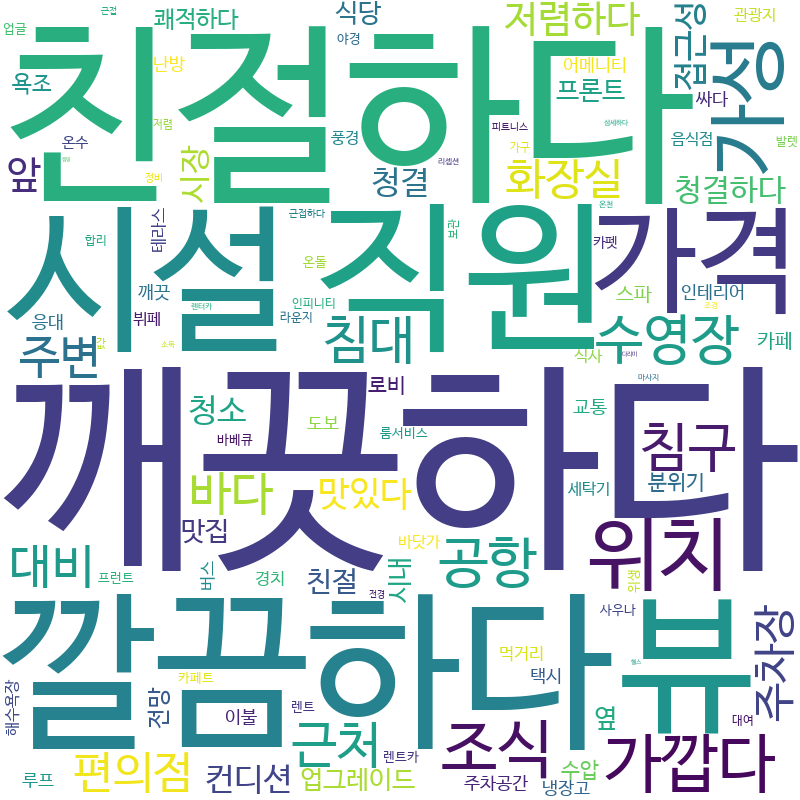

In [ ]:
# 일반 워드클라우드 파일 확인
import cv2
img = cv2.imread('wc_hotel_review.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
# 마스크 이미지로 워드클라우드 만들기

import requests
from wordcloud import WordCloud, ImageColorGenerator
from google.colab.patches import cv2_imshow
 
# 마스크 이미지를 url에서 불러오기 (트위터 모양)
#url = 'https://raw.githubusercontent.com/rasbt/datacollect/master/dataviz/twitter_cloud/twitter_mask.png'
#resp = requests.get(url)

#with open('twitter_mask.png', 'wb') as f:
#    f.write(resp.content)

#img = cv2.imread('twitter_mask.png', cv2.IMREAD_UNCHANGED)
#cv2_imshow(img)
#img

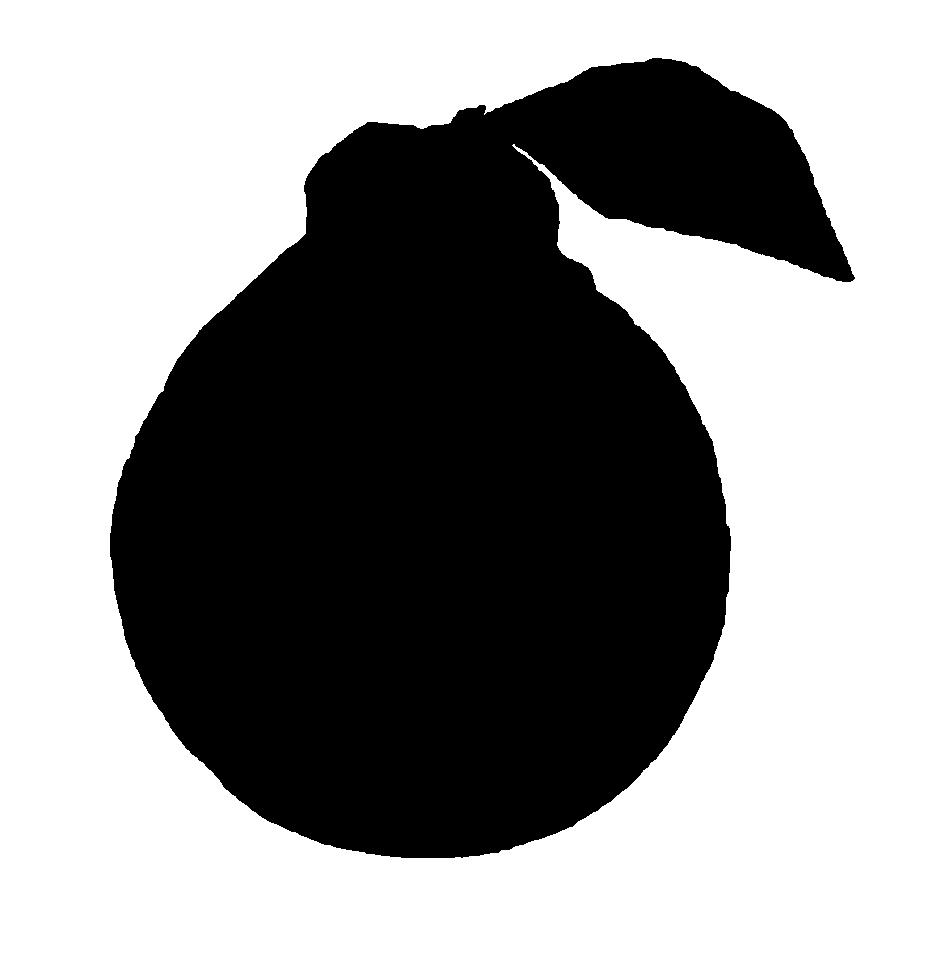

In [ ]:
# opencv 라이브러리 불러오기
import cv2

#원하는 이미지를 경로에 업로드 후 불러옴
test_image = cv2.imread("hanrabong.png", cv2.IMREAD_COLOR)

#불러온 이미지를 그레이 스케일로 변환
gray_tr01 = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#그레이스케일에 임계값을 적용하여 이진화 시킴
border01, binary01 = cv2.threshold(gray_tr01, 230, 255, cv2.THRESH_BINARY)

#원본 이미지 출력
#cv2_imshow(test_image)

#이진화한 이미지 출력
cv2_imshow(binary01)


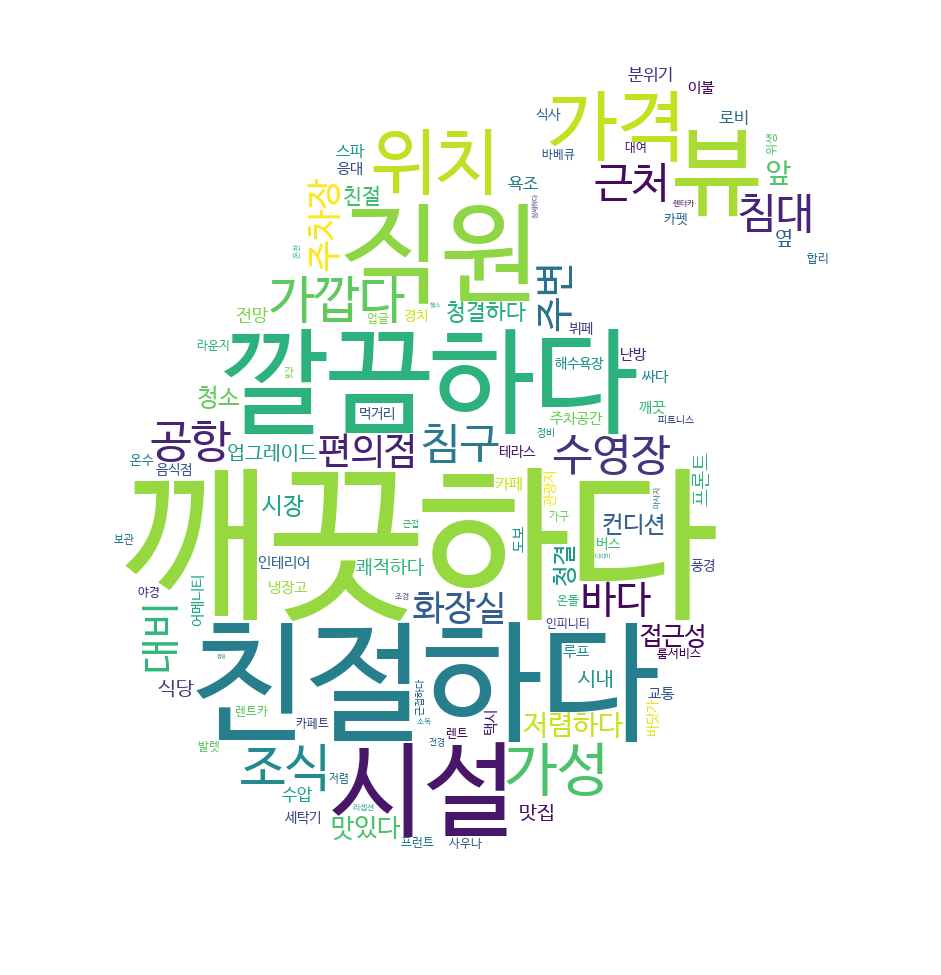

In [ ]:
# 마스크 이미지를 씌운 워드클라우드 파일 생성 및 출력

mask = np.array(binary01)

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
             background_color='white', 
             mask = mask,
             width = mask.shape[1], height = mask.shape[0], max_words=124, max_font_size=230).generate_from_frequencies(dict(counter))
wc.to_file("wc_jeju_map.png")

img = cv2.imread('wc_jeju_map.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)